# Christopher El Khouri

### Dataiku Data Scientist Technical Assessment

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

sns.set(style="whitegrid")



D:\Users\CHRIS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Introduction

The dataframe provided contains US Census data with detailed but anonymized information for 300,000 individuals along with income information. 

The objective is to identify the characteristics associated with an individual earning a total income of more or less than $50,000 a year.


# Table of Contents:

### 1 [EDA](#eda)
* [Total Income](#income)
* [Age](#age)
* [Employment](#employment)
* [Major Occupation Code](#occupation)
* [Major Industry Code](#industry)
* [Class of Worker](#class)
* [Own Business or Self Employed](#self_employed)
* [Education](#education)
* [Sex](#sex)
* [Marital Status](#marital)
   
### 2 [Data Preparation](#prep)
   
   
* [Total Income](#dp_totalincome)
* [Age](#dp_age)
* [Employment Status](#dp_emp)
* [Major Occupation Code](#dp_occ)
* [Major Industry Code](#dp_ind)
* [Class of Worker](#dp_class)
* [Education](#dp_education)
* [Preparation of Dummy Variables](#dp_dummy)
* [Loading the Test Set](#dp_test)
   
### 3 [Data Modeling](#model)

* [Naive Bayes](#dm_nb)
* [Logistic Regression](#dm_lr)
* [Classification Tree](#dm_ct)
   
   
   ### 4 [Modeling Assessment](#assess)
   
   ### 5 [Results](#results)

<a id="eda"></a> 
## 1 - EDA


The provided dataset contains approximately 42 columns of US Census information, however, the focus will be on the following variables:
* [Total Income](#income)
* [Age](#age)
* [Employment](#employment)
* [Major Occupation Code](#occupation)
* [Major Industry Code](#industry)
* [Class of Worker](#class)
* [Own Business or Self Employed](#self_employed)
* [Education](#education)
* [Sex](#sex)
* [Marital Status](#marital)


We'll start by loading the data:

In [3]:
df=pd.read_csv('census_income_learn.csv',header=None)

Naming the columns based on the census_income_metadata.txt file

In [4]:
df.columns=['age','class','industry code','occupation code','education',
            'wage_hr','enrolled in edu inst last wk','marital_status',
            'maj_ind','maj_occ','race','hispanic Origin','sex',
            'member of a labor union','reason for unemployment','employment',
            'capital_gains','capital_losses','divdends','tax filer status',
            'region of previous residence','state of previous residence',
            'detailed household and family stat','detailed household summary in household','instance_weight',
            'migration code-change in msa','migration code-change in reg',
            'migration code-move within reg ','live in this house 1 year ago',
            'migration prev res in sunbelt','num persons worked for employer',
            'family members under 18','country of birth father','country of birth mother',
            'country of birth self','citizenship','self_employed',
            'fill inc questionnaire for veterans admin ',
            'veterans benefits ','weeks worked in year ','year','total_income']

Isolating the features that will be analysed in this case study:

In [5]:
df=df[['age','employment','maj_occ','maj_ind','class','self_employed','education','sex','marital_status','total_income']]

 Obtaining the basic data frame info:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   age             199523 non-null  int64 
 1   employment      199523 non-null  object
 2   maj_occ         199523 non-null  object
 3   maj_ind         199523 non-null  object
 4   class           199523 non-null  object
 5   self_employed   199523 non-null  int64 
 6   education       199523 non-null  object
 7   sex             199523 non-null  object
 8   marital_status  199523 non-null  object
 9   total_income    199523 non-null  object
dtypes: int64(2), object(8)
memory usage: 15.2+ MB


There are 199,523 records (or observations) for each variable without any missing values.

Lets take a look at the first few rows:

In [7]:
df.head()

,age,employment,maj_occ,maj_ind,class,self_employed,education,sex,marital_status,total_income
0,73,Not in labor force,Not in universe,Not in universe or children,Not in universe,0,High school graduate,Female,Widowed,- 50000.
1,58,Children or Armed Forces,Precision production craft & repair,Construction,Self-employed-not incorporated,0,Some college but no degree,Male,Divorced,- 50000.
2,18,Not in labor force,Not in universe,Not in universe or children,Not in universe,0,10th grade,Female,Never married,- 50000.
3,9,Children or Armed Forces,Not in universe,Not in universe or children,Not in universe,0,Children,Female,Never married,- 50000.
4,10,Children or Armed Forces,Not in universe,Not in universe or children,Not in universe,0,Children,Female,Never married,- 50000.


We can confirm that the data loaded correctly.

<a id="income"></a> 

## Total Income

Total income, represented by the variable **total_income**, is the main variable of interest and represents whether or not an individuals total yearly income is greater than or less than $ 50,000.

'- 50000' indicates a total income less than 50,000, and '50000 +' indicates a total income greater than 50,000.

Calculating the proportions of each category:

In [8]:
df['total_income'].value_counts().sort_index()

 - 50000.    187141
 50000+.      12382
Name: total_income, dtype: int64

In [9]:
df['total_income'].value_counts(normalize=True).sort_index()

 - 50000.    0.937942
 50000+.     0.062058
Name: total_income, dtype: float64

Based on the above, only appox. 6% of our data consists of individuals with a total income greater than 50,000.

Showing the data graphically:

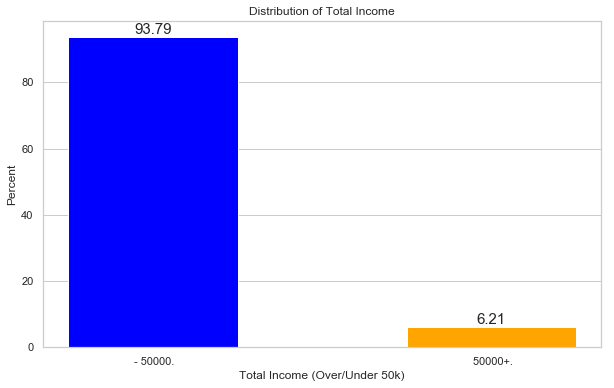

In [10]:
data = df['total_income'].value_counts(normalize=True).sort_index()*100
x = range( len( data))
width = 0.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
p1=axes.bar(x, data, width, align="center", color=["blue","orange"])
axes.set_xticks([0, 1])
axes.set_xticklabels(data.axes[0])
axes.set_title( "Distribution of Total Income")
axes.set_xlabel("Total Income (Over/Under 50k)")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
for idx,rect in enumerate(p1):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., 1.00*height,
           np.round(data[idx],2),
            ha='center', va='bottom', rotation=0,size=15)


plt.show()
plt.close()

In this analysis, 'high income' will refer to people making over $50,000 a year.

<a id="age"></a> 

## Age

Age, represented by the variable **age**, represents the age of the individual

The summary statistics are as follows:

In [11]:
df['age'].describe()

count    199523.000000
mean         34.494199
std          22.310895
min           0.000000
25%          15.000000
50%          33.000000
75%          50.000000
max          90.000000
Name: age, dtype: float64

We can see that the minimum age considered is 0 and the maximum age is 90, the data considers populations from all age groups. However, 50% of the population is of the age 33 or under.


Graphing the above:

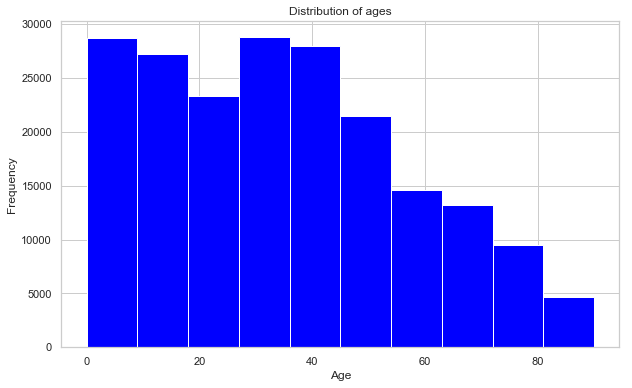

In [12]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.age, color="blue")
axes.set_title("Distribution of ages")
axes.set_xlabel("Age")
axes.set_ylabel("Frequency")

plt.show()
plt.close()

Age could definitely be  an explanatory variable that we could include in our model. It would be logical that income has a positively correlated relationship with age.

#### Pairwise EDA of total_income v Age:

Stacking the age distribution charts of those making above 50000 and those making below, we get the following:

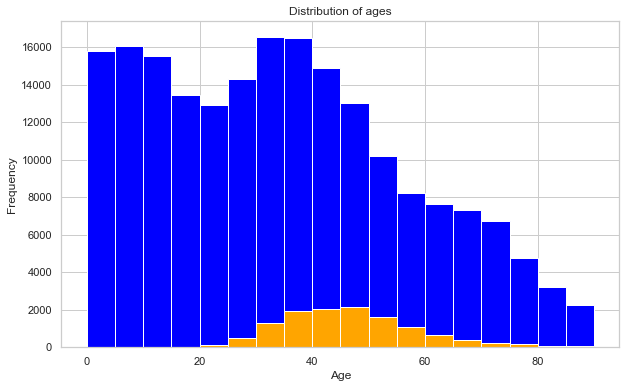

In [13]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist([df[df['total_income']==' 50000+.'].age,df[df['total_income']!=' 50000+.'].age],18, color=["orange","blue"],stacked=True)
axes.set_title("Distribution of ages")
axes.set_xlabel("Age")
axes.set_ylabel("Frequency")

plt.show()
plt.close()

The orange bars indicate the distribution of those making over $50,000. We can see a normal distribution type of shape, indicating a 'golden range' for high income, with most of the population making a higher income are between the ages of 30-60.

<a id="employment"></a> 

## Employment

Employment , represented by the variable **employment**, represents the employment status of the individual

Calculating the proportions of each category:

In [14]:
df['employment'].value_counts()

 Children or Armed Forces              123769
 Full-time schedules                    40736
 Not in labor force                     26808
 PT for non-econ reasons usually FT      3322
 Unemployed full-time                    2311
 PT for econ reasons usually PT          1209
 Unemployed part- time                    843
 PT for econ reasons usually FT           525
Name: employment, dtype: int64

In [15]:
df['employment'].value_counts(normalize=True)

 Children or Armed Forces              0.620324
 Full-time schedules                   0.204167
 Not in labor force                    0.134360
 PT for non-econ reasons usually FT    0.016650
 Unemployed full-time                  0.011583
 PT for econ reasons usually PT        0.006059
 Unemployed part- time                 0.004225
 PT for econ reasons usually FT        0.002631
Name: employment, dtype: float64

The categories are defined as follows:

* **Children or Armed Forces:** Either a child or a member of the Armed Forces.
* **Full-time schedules:** Persons on full-time schedules include persons working 35 hours or more, persons who worked 1-34 hours for noneconomic reasons (e.g., illness) and usually work full-time, and persons "with a job but not at work" who usually work full- time.

* **Not in labor force:** Included in this group are all persons in the civilian noninstitutional population who are neither employed nor unemployed.

* **PT for non-econ reasons usually FT:** Persons who work between 1 and 34 hours are designated as working "part-time" in the current job held during the reference week.Non-economic reasons includes labor dispute, bad weather, own illness, vacation, demands of home housework, school, no desire for full-time work, and full-time worker only during peak season.

* **Unemployed:** Unemployed persons are those civilians who, during the survey week, have no employment but are available for work, and (1) have engaged in any specific job seeking activity within the past 4 weeks such as registering at a public or private employment office, meeting with prospective employers, checking with friends or relatives, placing or answering advertisements, writing letters of application, or being on a union or professional register; (2) are waiting to be called back to a job from which they had been laid off; or (3) are waiting to report to a new wage or salary job within 30 days. The unemployed includes job leavers, job losers, new job entrants, and job reentrants.

* **PT for econ reasons usually FT:** Persons who work between 1 and 34 hours are designated as working "part-time" in the current job held during the reference week.Economic reasons includes  slack work, material shortages, repairs to plant or equipment, start or termination of job during the week, and inability to find full-time work.


Employment could bean explanatory variable that we could include in our model. I would assume that people with more stable jobs (Full-time schedules) would probably be making a higher income. 

#### Pairwise EDA of total_income v Employment status:

Producing a contingency table of total_income v Employment:

In [16]:
contigency_pct = pd.crosstab(df['employment'], df['total_income'], normalize='index')
contigency_pct

total_income,- 50000.,50000+.
employment,,
Children or Armed Forces,0.952541,0.047459
Full-time schedules,0.868274,0.131726
Not in labor force,0.982766,0.017234
PT for econ reasons usually FT,0.940952,0.059048
PT for econ reasons usually PT,0.871795,0.128205
PT for non-econ reasons usually FT,0.881698,0.118302
Unemployed full-time,0.964085,0.035915
Unemployed part- time,0.978648,0.021352


Graphing the proportions of the employment status' with total_income values greater than 50000:

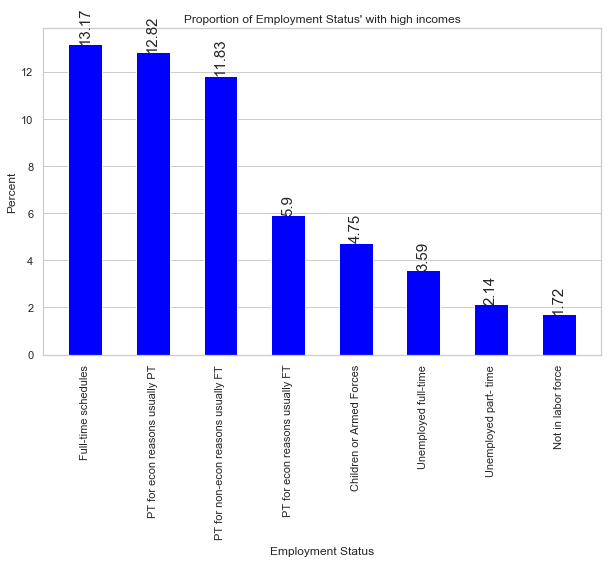

In [17]:
data = contigency_pct.iloc[:,1].sort_values(ascending=False)*100
x = range( len( data))
width = 0.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
p1=axes.bar(x, data, width, align="center", color="blue")
axes.set_xticks(range(len(data)))
axes.set_xticklabels(data.axes[0],rotation=90)
axes.set_title( "Proportion of Employment Status' with high incomes")
axes.set_xlabel("Employment Status")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
for idx,rect in enumerate(p1):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., 1.00*height,
           np.round(data[idx],2),
            ha='center', va='bottom', rotation=90,size=15)


plt.show()
plt.close()

As expected, people with full-time schedules have the highest probability of making a high income.

There is a clear correlation between the employment status of a person and their probability of making a high income.

<a id="occupation"></a> 

## Major Occupation Code

Major Occupation Code, represented by the variable **maj_occ**, represents the occupation of the individual

Calculating the proportions of each category:

In [18]:
df['maj_occ'].value_counts()

 Not in universe                          100684
 Adm support including clerical            14837
 Professional specialty                    13940
 Executive admin and managerial            12495
 Other service                             12099
 Sales                                     11783
 Precision production craft & repair       10518
 Machine operators assmblrs & inspctrs      6379
 Handlers equip cleaners etc                4127
 Transportation and material moving         4020
 Farming forestry and fishing               3146
 Technicians and related support            3018
 Protective services                        1661
 Private household services                  780
 Armed Forces                                 36
Name: maj_occ, dtype: int64

In [19]:
df['maj_occ'].value_counts(normalize=True)

 Not in universe                          0.504624
 Adm support including clerical           0.074362
 Professional specialty                   0.069867
 Executive admin and managerial           0.062624
 Other service                            0.060640
 Sales                                    0.059056
 Precision production craft & repair      0.052716
 Machine operators assmblrs & inspctrs    0.031971
 Handlers equip cleaners etc              0.020684
 Transportation and material moving       0.020148
 Farming forestry and fishing             0.015768
 Technicians and related support          0.015126
 Protective services                      0.008325
 Private household services               0.003909
 Armed Forces                             0.000180
Name: maj_occ, dtype: float64

The categories are as follows:


* **Adm support including clerical:** Office and Administrative Support Occupations

* **Professional specialty:** Professional and related occupations

* **Executive admin and managerial:** Management, business, and financial occupations

* **Other service:** Service occupations

* **Sales:** Sales and related occupations

* **Precision production craft & repair:** Precision instrument and equipment crafters,repairers, and producers.

* **Machine operators assmblrs & inspctrs:** Machine operators, assemblers, and inspectors.

* **Handlers equip cleaners etc:** Equipment Handlers and Cleaners

* **Transportation and material moving**

* **Farming, forestry ,and fishing**

* **Technicians and related support**

* **Protective services**

* **Private household services**

* **Armed Forces**

* **Not in universe:** None of the above


Major Occupation seems it could be an explanatory variable that we could include in our model. People with specialist and mangerial jobs would probably be making higher incomes. 

#### Pairwise EDA of total_income v Major Occupation Code:

Producing a contingency table of total_income v Major Occupation Code:

In [20]:
contigency_pct = pd.crosstab(df['maj_occ'], df['total_income'], normalize='index')
contigency_pct

total_income,- 50000.,50000+.
maj_occ,,
Adm support including clerical,0.969940,0.030060
Armed Forces,0.777778,0.222222
Executive admin and managerial,0.712445,0.287555
Farming forestry and fishing,0.949142,0.050858
Handlers equip cleaners etc,0.980858,0.019142
Machine operators assmblrs & inspctrs,0.963160,0.036840
Not in universe,0.991002,0.008998
Other service,0.990082,0.009918
Precision production craft & repair,0.909203,0.090797


Graphing the proportions of the occupation codes with total_income values greater than 50000:

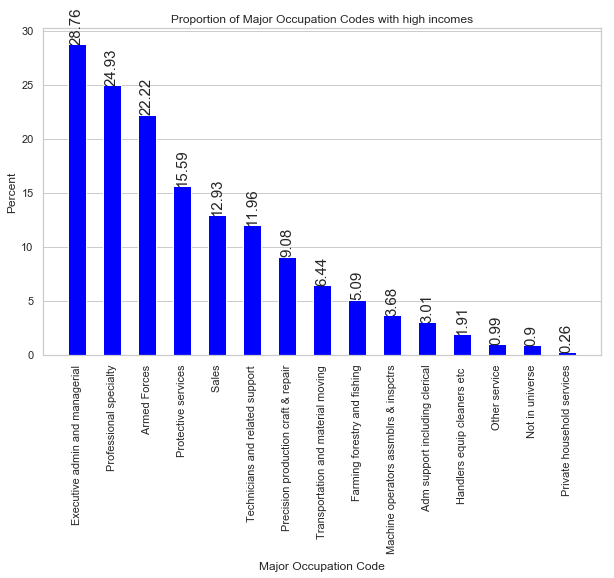

In [21]:
data = contigency_pct.iloc[:,1].sort_values(ascending=False)*100
x = range( len( data))
width = 0.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
p1=axes.bar(x, data, width, align="center", color="blue")
axes.set_xticks(range(len(data)))
axes.set_xticklabels(data.axes[0],rotation=90)
axes.set_title( "Proportion of Major Occupation Codes with high incomes")
axes.set_xlabel("Major Occupation Code")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
for idx,rect in enumerate(p1):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., 1.00*height,
           np.round(data[idx],2),
            ha='center', va='bottom', rotation=90,size=15)


plt.show()
plt.close()

As shown on the chart, there is clearly a corrolation between the major occupation code of an individual and their total income. People with executive admin and managerial occupations have a probability of 29% to have total income values greater than 50000, whereas Admin support roles have only a 3 % chance.


<a id="industry"></a> 

## Major Industry Code

Major Industry Code, represented by the variable **maj_ind**, represents the industry of the individual

Calculating the proportions of each category:

In [22]:
df['maj_ind'].value_counts()

 Not in universe or children            100684
 Retail trade                            17070
 Manufacturing-durable goods              9015
 Education                                8283
 Manufacturing-nondurable goods           6897
 Finance insurance and real estate        6145
 Construction                             5984
 Business and repair services             5651
 Medical except hospital                  4683
 Public administration                    4610
 Other professional services              4482
 Transportation                           4209
 Hospital services                        3964
 Wholesale trade                          3596
 Agriculture                              3023
 Personal services except private HH      2937
 Social services                          2549
 Entertainment                            1651
 Communications                           1181
 Utilities and sanitary services          1178
 Private household services                945
 Mining      

In [23]:
df['maj_ind'].value_counts(normalize=True)

 Not in universe or children            0.504624
 Retail trade                           0.085554
 Manufacturing-durable goods            0.045183
 Education                              0.041514
 Manufacturing-nondurable goods         0.034567
 Finance insurance and real estate      0.030798
 Construction                           0.029992
 Business and repair services           0.028323
 Medical except hospital                0.023471
 Public administration                  0.023105
 Other professional services            0.022464
 Transportation                         0.021095
 Hospital services                      0.019867
 Wholesale trade                        0.018023
 Agriculture                            0.015151
 Personal services except private HH    0.014720
 Social services                        0.012775
 Entertainment                          0.008275
 Communications                         0.005919
 Utilities and sanitary services        0.005904
 Private household s

Clarifying some of the categories:


* **Nondurable goods:** Nondurable goods are any consumer goods in an economy that are either consumed in one use or used up over a short period of time (considered by the United States Bureau of Economic Analysis to be within three years) and must be bought again in successive purchases.

* **Durable goods:** Goods not for immediate consumption and able to be kept for a period of time; consumer durables.

* **Medical except hospital:** The medical industry with the exception of hospitals.

* **Personal services except private HH:** Personal services with the exception of private household services.

* **Not in universe or children:** None of the listed industries, or a child

Major Industry seems it could be an explanatory variable that we could include in our model. 

We will dive deper into this analysis by conducting a pairwise EDA.

#### Pairwise EDA of total_income v Major Industry Code:

Producing a contingency table of total_income v Major Industry Code:

In [24]:
contigency_pct = pd.crosstab(df['maj_ind'], df['total_income'], normalize='index')
contigency_pct

total_income,- 50000.,50000+.
maj_ind,,
Agriculture,0.941118,0.058882
Armed Forces,0.777778,0.222222
Business and repair services,0.890462,0.109538
Communications,0.771380,0.228620
Construction,0.910929,0.089071
Education,0.892430,0.107570
Entertainment,0.931557,0.068443
Finance insurance and real estate,0.817901,0.182099
Forestry and fisheries,0.860963,0.139037


Graphing the percentages of the industry codes with total_income values greater than 50000:

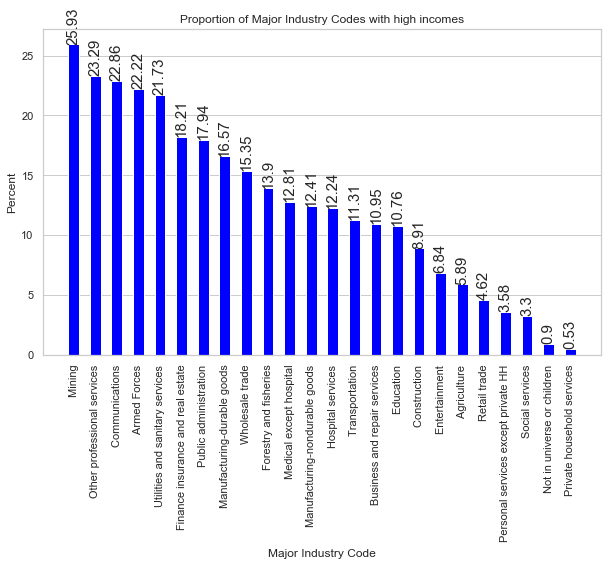

In [25]:
data = contigency_pct.iloc[:,1].sort_values(ascending=False)*100
x = range( len( data))
width = 0.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
p1=axes.bar(x, data, width, align="center", color="blue")
axes.set_xticks(range(len(data)))
axes.set_xticklabels(data.axes[0],rotation=90)
axes.set_title( "Proportion of Major Industry Codes with high incomes")
axes.set_xlabel("Major Industry Code")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
for idx,rect in enumerate(p1):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., 1.00*height,
           np.round(data[idx],2),
            ha='center', va='bottom', rotation=90,size=15)


plt.show()
plt.close()

As shown on the chart, there is clearly some statiscal dependancy between the major industry code of an individual and their total income. People in Mining have a probability of 26% to have total income values greater than 50000, whereas Private Household services have only a 1 % probability.


<a id="class"></a> 

## Class of Worker

Class of Worker, represented by the variable **class**, represents the broad classification of the person's employer.

Calculating the proportions of each category:

In [26]:
df['class'].value_counts()

 Not in universe                   100245
 Private                            72028
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal government                  2925
 Never worked                         439
 Without pay                          165
Name: class, dtype: int64

In [27]:
df['class'].value_counts(normalize=True)

 Not in universe                   0.502423
 Private                           0.361001
 Self-employed-not incorporated    0.042326
 Local government                  0.039013
 State government                  0.021186
 Self-employed-incorporated        0.016364
 Federal government                0.014660
 Never worked                      0.002200
 Without pay                       0.000827
Name: class, dtype: float64

The categories are as follows:

* **Private and government:** These are considered "wage and salary workers"

* **Self-employed- not incorporated:** This considers those that are self-employed in an unincorporated business. Ex: Freelancers.

* **Local government:** A local government employer

* **State government:** A state government employer

* **Self-employed-incorporated:** This considers those that are self-employed in an incorporated business.

* **Federal government:** A federal government employer

* **Without Pay:** A currently unemployed or unpaid worker

* **Never Worked:** A person who has never worked


Class of Worker could be an explanatory variable that we could include in our model. I would assume that people that are in the federal government would probably earn more than people in a local government, and that self-exmployed people in incorporated business get paid the most.

#### Pairwise EDA of total_income v Class:

Producing a contingency table of total_income v Class:

In [28]:
contigency_pct = pd.crosstab(df['class'], df['total_income'], normalize='index')
contigency_pct

total_income,- 50000.,50000+.
class,,
Federal government,0.795897,0.204103
Local government,0.891187,0.108813
Never worked,0.995444,0.004556
Not in universe,0.990982,0.009018
Private,0.898345,0.101655
Self-employed-incorporated,0.652680,0.347320
Self-employed-not incorporated,0.870930,0.129070
State government,0.885261,0.114739
Without pay,0.993939,0.006061


Graphing the above:

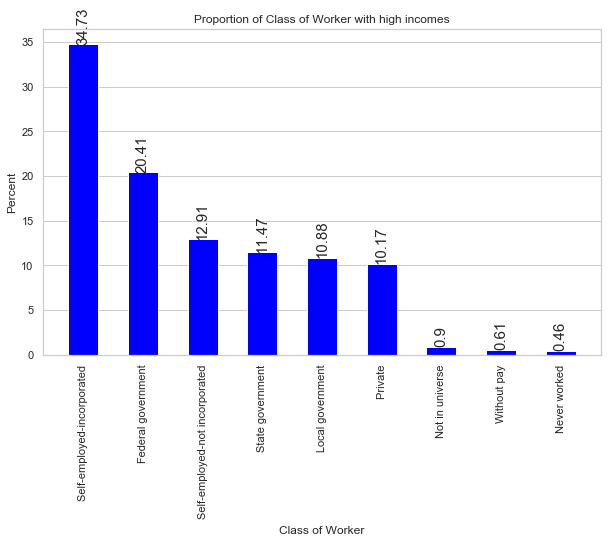

In [29]:
data = contigency_pct.iloc[:,1].sort_values(ascending=False)*100
x = range( len( data))
width = 0.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
p1=axes.bar(x, data, width, align="center", color="blue")
axes.set_xticks(range(len(data)))
axes.set_xticklabels(data.axes[0],rotation=90)
axes.set_title( "Proportion of Class of Worker with high incomes")
axes.set_xlabel("Class of Worker")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
for idx,rect in enumerate(p1):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., 1.00*height,
           np.round(data[idx],2),
            ha='center', va='bottom', rotation=90,size=15)


plt.show()
plt.close()

There is a clear corrolation.

<a id="self_employed"></a> 

## Own Business or Self Employed

Own Business or Self Employed, represented by the variable **self_employed**n represents whether an individual is self-employed or not. 

Values of 1 indicate yes, 2 indicate no, and 0 indicated NIU (Not in Universe)

Calculating the proportions of each category:

In [30]:
df['self_employed'].value_counts(normalize=True)

0    0.905520
2    0.080958
1    0.013522
Name: self_employed, dtype: float64

This is not a reliable feature to consider, 91 % have values of NIU, this question is not always provided or answered by most of the sample. 

Furthermore, we have indications of whether a person is self employed from other columns.

**This feature will not be considered in the model.**

<a id="education"></a> 

## Education

Education, represented by the variable **education**, represents the education level of an individual.

Calculating the proportions of each category:

In [31]:
df['education'].value_counts()

 High school graduate                      48407
 Children                                  47422
 Some college but no degree                27820
 Bachelors degree(BA AB BS)                19865
 7th and 8th grade                          8007
 10th grade                                 7557
 11th grade                                 6876
 Masters degree(MA MS MEng MEd MSW MBA)     6541
 9th grade                                  6230
 Associates degree-occup /vocational        5358
 Associates degree-academic program         4363
 5th or 6th grade                           3277
 12th grade no diploma                      2126
 1st 2nd 3rd or 4th grade                   1799
 Prof school degree (MD DDS DVM LLB JD)     1793
 Doctorate degree(PhD EdD)                  1263
 Less than 1st grade                         819
Name: education, dtype: int64

In [32]:
df['education'].value_counts(normalize=True)

 High school graduate                      0.242614
 Children                                  0.237677
 Some college but no degree                0.139433
 Bachelors degree(BA AB BS)                0.099562
 7th and 8th grade                         0.040131
 10th grade                                0.037875
 11th grade                                0.034462
 Masters degree(MA MS MEng MEd MSW MBA)    0.032783
 9th grade                                 0.031224
 Associates degree-occup /vocational       0.026854
 Associates degree-academic program        0.021867
 5th or 6th grade                          0.016424
 12th grade no diploma                     0.010655
 1st 2nd 3rd or 4th grade                  0.009017
 Prof school degree (MD DDS DVM LLB JD)    0.008986
 Doctorate degree(PhD EdD)                 0.006330
 Less than 1st grade                       0.004105
Name: education, dtype: float64

The categories are self-explanatory.

Education could be an explanatory variable that we could include in our model. People with higher education levels (Masters and PhDs) would probably be making higher incomes than people with no formal education.


#### Pairwise EDA of total_income v Education:

Producing a contingency table of total_income v Education:

In [33]:
contigency_pct = pd.crosstab(df['education'], df['total_income'], normalize='index')
contigency_pct

total_income,- 50000.,50000+.
education,,
10th grade,0.991796,0.008204
11th grade,0.989820,0.010180
12th grade no diploma,0.984008,0.015992
1st 2nd 3rd or 4th grade,0.992774,0.007226
5th or 6th grade,0.993287,0.006713
7th and 8th grade,0.991008,0.008992
9th grade,0.993900,0.006100
Associates degree-academic program,0.905570,0.094430
Associates degree-occup /vocational,0.922919,0.077081


Graphing the percentages of the education levels with total_income values greater than 50000:

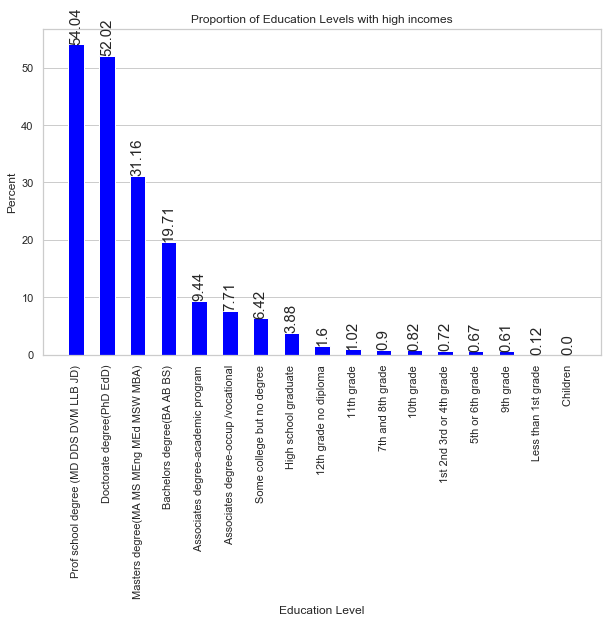

In [34]:
data = contigency_pct.iloc[:,1].sort_values(ascending=False)*100
x = range( len( data))
width = 0.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
p1=axes.bar(x, data, width, align="center", color="blue")
axes.set_xticks(range(len(data)))
axes.set_xticklabels(data.axes[0],rotation=90)
axes.set_title( "Proportion of Education Levels with high incomes")
axes.set_xlabel("Education Level")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
for idx,rect in enumerate(p1):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., 1.00*height,
           np.round(data[idx],2),
            ha='center', va='bottom', rotation=90,size=15)


plt.show()
plt.close()

As expected, there is a statistical correlation between Education Level and income. People with Doctorates and Professional School degrees have over a 50 % probabolity of making a high income. High School graduates, for example, ave only a 4 % probability.

<a id="sex"></a> 

## Sex

Sex, represented by the variable **sex**, represents the gender of the individual.

Calculating the proportions of each category:

In [35]:
df['sex'].value_counts()

 Female    103984
 Male       95539
Name: sex, dtype: int64

In [36]:
df['sex'].value_counts(normalize=True)

 Female    0.521163
 Male      0.478837
Name: sex, dtype: float64

52 % Female and 48 % Male, a relatively even distribution of genders in our dataset.


#### Pairwise EDA of total_income v Sex:

producing a contingency table:

In [37]:
contigency_pct = pd.crosstab(df['sex'], df['total_income'], normalize='index')
contigency_pct

total_income,- 50000.,50000+.
sex,,
Female,0.974390,0.025610
Male,0.898272,0.101728


Males have a 10% probability of earning over $50,000, whereas Females have a 2.5 % probability.

Sex will be included in our model.

<a id="marital_status"></a> 

## Marital Status

**marital_status** represents the marital status of the individual.

Calculating the proportions of each category:

In [38]:
df['marital_status'].value_counts()

 Never married                      86485
 Married-civilian spouse present    84222
 Divorced                           12710
 Widowed                            10463
 Separated                           3460
 Married-spouse absent               1518
 Married-A F spouse present           665
Name: marital_status, dtype: int64

In [39]:
df['marital_status'].value_counts(normalize=True)

 Never married                      0.433459
 Married-civilian spouse present    0.422117
 Divorced                           0.063702
 Widowed                            0.052440
 Separated                          0.017341
 Married-spouse absent              0.007608
 Married-A F spouse present         0.003333
Name: marital_status, dtype: float64

#### Pairwise EDA of total_income v marital_status:

Producing a contingency table:

In [40]:
contigency_pct = pd.crosstab(df['marital_status'], df['total_income'], normalize='index')
contigency_pct

total_income,- 50000.,50000+.
marital_status,,
Divorced,0.916129,0.083871
Married-A F spouse present,0.977444,0.022556
Married-civilian spouse present,0.886016,0.113984
Married-spouse absent,0.936759,0.063241
Never married,0.987084,0.012916
Separated,0.954335,0.045665
Widowed,0.968460,0.031540


Graphing the percentages of the marital status' with total_income values greater than $50,000:

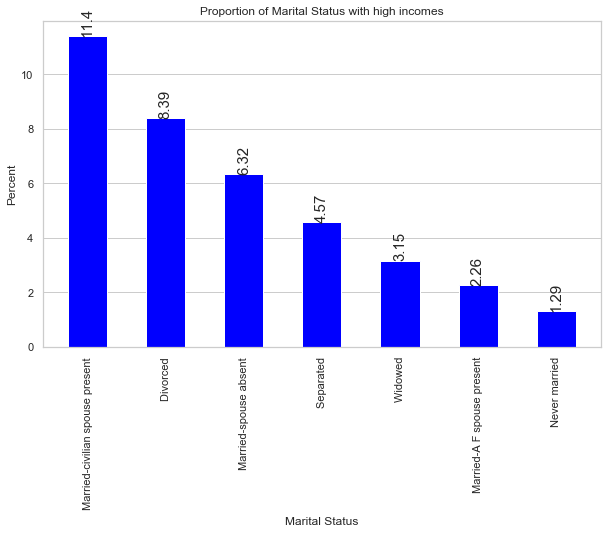

In [41]:
data = contigency_pct.iloc[:,1].sort_values(ascending=False)*100
x = range( len( data))
width = 0.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
p1=axes.bar(x, data, width, align="center", color="blue")
axes.set_xticks(range(len(data)))
axes.set_xticklabels(data.axes[0],rotation=90)
axes.set_title( "Proportion of Marital Status with high incomes")
axes.set_xlabel("Marital Status")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
for idx,rect in enumerate(p1):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., 1.00*height,
           np.round(data[idx],2),
            ha='center', va='bottom', rotation=90,size=15)


plt.show()
plt.close()

Married and Divorced peopble have the higher probabilities. This is likely to be associated with age, as the older you are the more likely you are to be married or have been married.

This correlation is not causal, yet slightly associated with having a higher income.

**However, this will not be included in our model.**

<a id="prep"></a> 
## 2 - Data Preparation


Based on our EDA, we will begin preparing our data for model generation.

* [Total Income](#dp_totalincome)
* [Age](#dp_age)
* [Employment Status](#dp_emp)
* [Major Occupation Code](#dp_occ)
* [Major Industry Code](#dp_ind)
* [Class of Worker](#dp_class)
* [Education](#dp_education)
* [Preparation of Dummy Variables](#dp_dummy)
* [Loading the Test Set](#dp_test)

<a id="dp_totalincome"></a> 

## Total Income

A feature `total_income_01` will be added, this represents a binary value of whether or not a person is making over 50000. A value of `1` indicates over 50000 and `0` indicates otherwise.

In [42]:
df['total_income_01']=df['total_income'].apply(lambda x: 1 if '+' in x else 0)

<a id="dp_age"></a> 

## Age

The `age_01` feature will be added, this represents the Min/Max scalar of `age` applied to it. Considering minimum and maximum values of 0 and 90 respectively and producing the values of `age` to be between 0 and 1.

In [43]:
df['age_01']=df['age']/90

<a id="dp_emp"></a> 

## Employment Status

Referring back to the chart of probabilities of Employment Status' having high incomes:

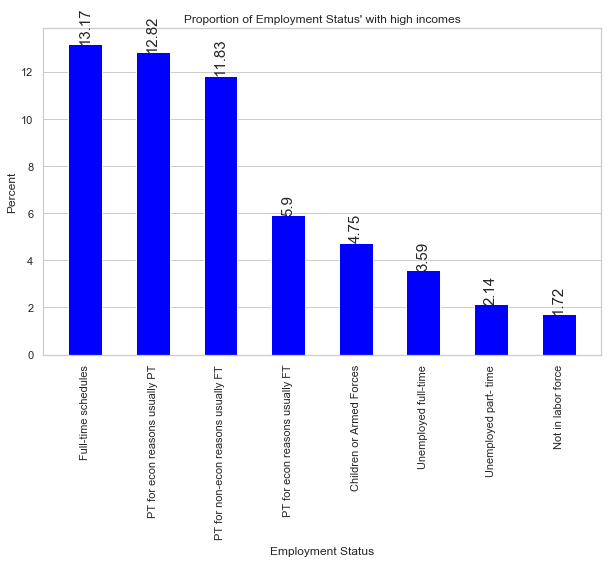

In [44]:
data = pd.crosstab(df['employment'], df['total_income'], normalize='index').iloc[:,1].sort_values(ascending=False)*100
x = range( len( data))
width = 0.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
p1=axes.bar(x, data, width, align="center", color="blue")
axes.set_xticks(range(len(data)))
axes.set_xticklabels(data.axes[0],rotation=90)
axes.set_title( "Proportion of Employment Status' with high incomes")
axes.set_xlabel("Employment Status")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
for idx,rect in enumerate(p1):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., 1.00*height,
           np.round(data[idx],2),
            ha='center', va='bottom', rotation=90,size=15)


plt.show()
plt.close()

The Employment Status' 'Not in labor force','Unemployed part-time', and 'Unemployed full-time' can be grouped into a category 'None of the Above'. 

Since our study is primarily targeting the characteristics of whether a person is making more or less than $ 50,000 a year, and those 3 categories have probabilities of less than 0.05, grouping them will facilitate our model generation without any significant harm to accuracy.

The `emp_01` feature will be added, this represents the modified grouping of `employment`

In [45]:
df['emp1']=df['employment'].copy()
df['emp1']=df['emp1'].apply(lambda x: 'None of the Above' if 'Unemployed' in x else x)
df['emp1']=df['emp1'].apply(lambda x: 'None of the Above' if 'labor force' in x else x)

In [46]:
pd.crosstab(df['emp1'], df['total_income'])

total_income,- 50000.,50000+.
emp1,,
Children or Armed Forces,117895,5874
Full-time schedules,35370,5366
PT for econ reasons usually FT,494,31
PT for econ reasons usually PT,1054,155
PT for non-econ reasons usually FT,2929,393
None of the Above,29399,563


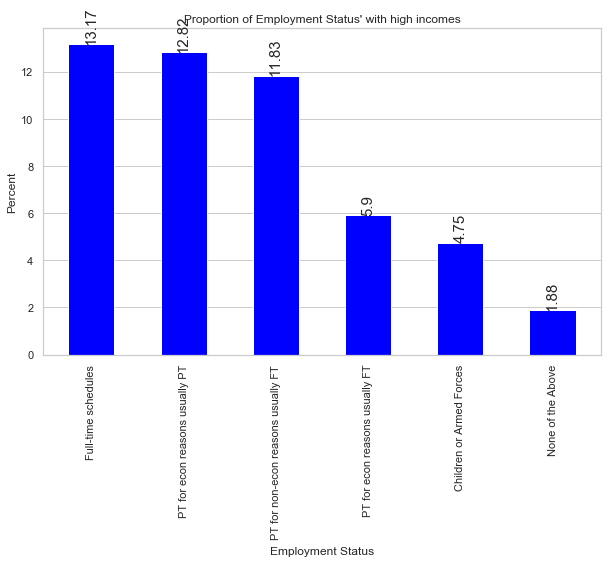

In [47]:
data = pd.crosstab(df['emp1'], df['total_income'], normalize='index').iloc[:,1].sort_values(ascending=False)*100
x = range( len( data))
width = 0.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
p1=axes.bar(x, data, width, align="center", color="blue")
axes.set_xticks(range(len(data)))
axes.set_xticklabels(data.axes[0],rotation=90)
axes.set_title( "Proportion of Employment Status' with high incomes")
axes.set_xlabel("Employment Status")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
for idx,rect in enumerate(p1):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., 1.00*height,
           np.round(data[idx],2),
            ha='center', va='bottom', rotation=90,size=15)


plt.show()
plt.close()

The Employment Status' with associated with high incomes are:

1. Full-time schedules
2. Part-time for economic reasons and usually part-time
3. Part-time for non-economic reasons and usually full-time

People with full-time schedules have the highest probability of making a high income. Part-time for economic reasons and usually part-time would be those that are part-time workers by choice, those with high incomes are probably specialists in their fields. Part-time for non-economic reasons and usually full-time are those with full-time jobs that require less hours from them for non-economic reasons, eg. Seasonal jobs.


<a id="dp_occ"></a> 

## Major Occupation

Referring back to the chart of probabilities of Major Occupation Codes having high incomes:

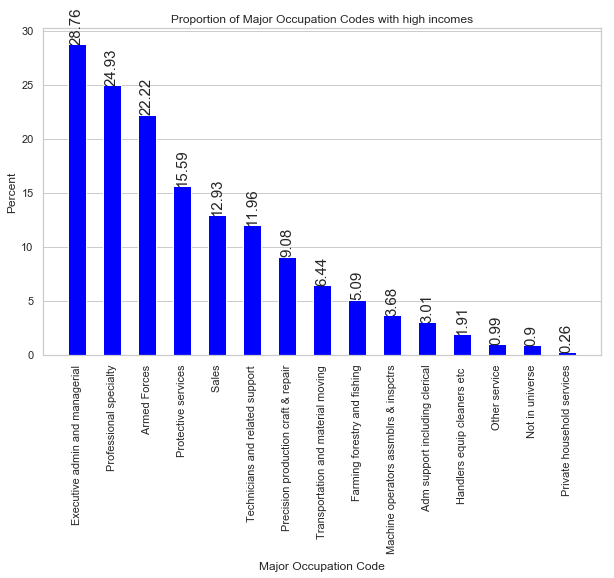

In [48]:
data =  pd.crosstab(df['maj_occ'], df['total_income'], normalize='index').iloc[:,1].sort_values(ascending=False)*100
x = range( len( data))
width = 0.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
p1=axes.bar(x, data, width, align="center", color="blue")
axes.set_xticks(range(len(data)))
axes.set_xticklabels(data.axes[0],rotation=90)
axes.set_title( "Proportion of Major Occupation Codes with high incomes")
axes.set_xlabel("Major Occupation Code")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
for idx,rect in enumerate(p1):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., 1.00*height,
           np.round(data[idx],2),
            ha='center', va='bottom', rotation=90,size=15)


plt.show()
plt.close()

The Major Occupation Codes having percentages of less than 5% can be grouped into 'None of the Above'. They won't have any strong impact on our model due to their low values.

The `occ1` feature will be added, representing the modified grouping of `maj_occ`

In [49]:
df['occ1']=df['maj_occ'].copy()
df['occ1']=df['occ1'].apply(lambda x: 'None of the Above' if 'Private household' in x else x)
df['occ1']=df['occ1'].apply(lambda x: 'None of the Above' if 'universe' in x else x)
df['occ1']=df['occ1'].apply(lambda x: 'None of the Above' if 'Other service' in x else x)
df['occ1']=df['occ1'].apply(lambda x: 'None of the Above' if 'Handlers equip' in x else x)
df['occ1']=df['occ1'].apply(lambda x: 'None of the Above' if 'Adm support' in x else x)
df['occ1']=df['occ1'].apply(lambda x: 'None of the Above' if 'Machine operators' in x else x)

In [50]:
pd.crosstab(df['occ1'], df['total_income'])

total_income,- 50000.,50000+.
occ1,,
Armed Forces,28,8
Executive admin and managerial,8902,3593
Farming forestry and fishing,2986,160
Precision production craft & repair,9563,955
Professional specialty,10465,3475
Protective services,1402,259
Sales,10259,1524
Technicians and related support,2657,361
Transportation and material moving,3761,259


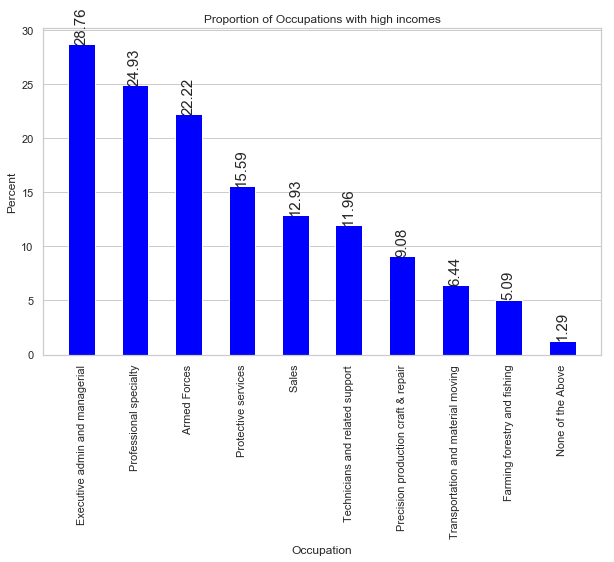

In [51]:
data = pd.crosstab(df['occ1'], df['total_income'], normalize='index').iloc[:,1].sort_values(ascending=False)*100
x = range( len( data))
width = 0.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
p1=axes.bar(x, data, width, align="center", color="blue")
axes.set_xticks(range(len(data)))
axes.set_xticklabels(data.axes[0],rotation=90)
axes.set_title( "Proportion of Occupations with high incomes")
axes.set_xlabel("Occupation")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
for idx,rect in enumerate(p1):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., 1.00*height,
           np.round(data[idx],2),
            ha='center', va='bottom', rotation=90,size=15)


plt.show()
plt.close()

The occupations associated with high incomes are:

1. Executive administrative and managerial roles
2. Professional speciality roles


Executive administrative and managerial roles refer to management, business, and financial occupations. This would include the C-suite level of employees. 

Armed Forces although is the third most associated occupation with high income, the quantity of data points considered for this category is 36, which is an extremely small sample and is therefore not conclusive. 

<a id="dp_ind"></a> 

## Major Industry

Referring back to the chart of probabilities of Major Industry Codes having high incomes:

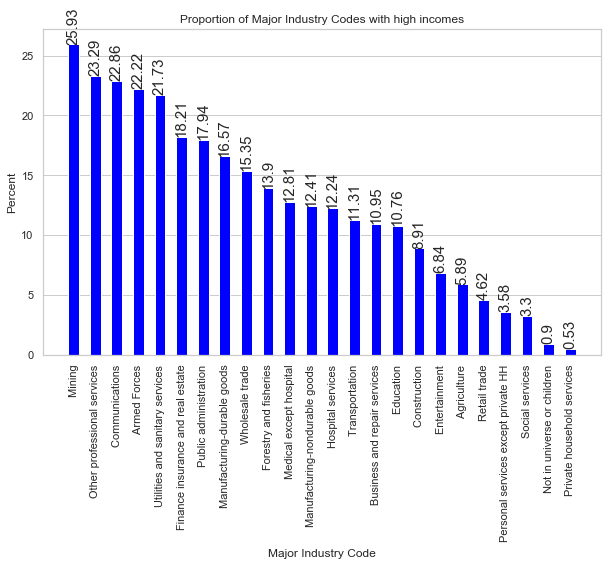

In [52]:
data = pd.crosstab(df['maj_ind'], df['total_income'], normalize='index').iloc[:,1].sort_values(ascending=False)*100
x = range( len( data))
width = 0.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
p1=axes.bar(x, data, width, align="center", color="blue")
axes.set_xticks(range(len(data)))
axes.set_xticklabels(data.axes[0],rotation=90)
axes.set_title( "Proportion of Major Industry Codes with high incomes")
axes.set_xlabel("Major Industry Code")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
for idx,rect in enumerate(p1):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., 1.00*height,
           np.round(data[idx],2),
            ha='center', va='bottom', rotation=90,size=15)


plt.show()
plt.close()

We can group the following Major Industry Codes together based on similar proportions:

* **None of the Above**: 'Private household services','Not in universe or children','Social services','Personal services': 

* **Retail, Agriculture, and Entertainment**

* **Transportation,Repair, and Education**

* **Hospital/NonDurableM**: Hospital services and Manufacturing of nondurable goods

* **Finance/RealEstate/PA**: Finance, Real Estate, and Public Administration

* **AF/U**: Armed Forces and Utilities 

* **C/PS**: Communications and Professional Services

This grouping will decrease the number of dummy variables required for modeling.

The `ind1` feature will be added, this represents the modified grouping of `maj_ind`

In [53]:
df['ind1']=df['maj_ind'].copy()
df['ind1']=df['ind1'].apply(lambda x: 'None of the Above' if 'Private household' in x else x)
df['ind1']=df['ind1'].apply(lambda x: 'None of the Above' if 'universe' in x else x)
df['ind1']=df['ind1'].apply(lambda x: 'None of the Above' if 'Social services' in x else x)
df['ind1']=df['ind1'].apply(lambda x: 'None of the Above' if 'HH' in x else x)


df['ind1']=df['ind1'].apply(lambda x: 'Agriculture/Retail/Entertainment' if 'Retail' in x else x)
df['ind1']=df['ind1'].apply(lambda x: 'Agriculture/Retail/Entertainment' if 'Agric' in x else x)
df['ind1']=df['ind1'].apply(lambda x: 'Agriculture/Retail/Entertainment' if 'Entertai' in x else x)

df['ind1']=df['ind1'].apply(lambda x: 'Transportation/Repair/Education' if 'Transp' in x else x)
df['ind1']=df['ind1'].apply(lambda x: 'Transportation/Repair/Education' if 'repair' in x else x)
df['ind1']=df['ind1'].apply(lambda x: 'Transportation/Repair/Education' if 'Educa' in x else x)

df['ind1']=df['ind1'].apply(lambda x: 'Hospital/NonDurableM' if 'Hospital serv' in x else x)
df['ind1']=df['ind1'].apply(lambda x: 'Hospital/NonDurableM' if 'nondurable' in x else x)


df['ind1']=df['ind1'].apply(lambda x: 'Finance/RealEstate/PA' if 'Finance' in x else x)
df['ind1']=df['ind1'].apply(lambda x: 'Finance/RealEstate/PA' if 'Public adm' in x else x)


df['ind1']=df['ind1'].apply(lambda x: 'AF/U' if 'Armed' in x else x)
df['ind1']=df['ind1'].apply(lambda x: 'AF/U' if 'Utilities' in x else x)


df['ind1']=df['ind1'].apply(lambda x: 'C/PS' if 'Commun' in x else x)
df['ind1']=df['ind1'].apply(lambda x: 'C/PS' if 'professional serv' in x else x)


In [54]:
pd.crosstab(df['ind1'], df['total_income'])

total_income,- 50000.,50000+.
ind1,,
Construction,5451,533
Forestry and fisheries,161,26
Manufacturing-durable goods,7521,1494
Medical except hospital,4083,600
Mining,417,146
Wholesale trade,3044,552
AF/U,950,264
Agriculture/Retail/Entertainment,20664,1080
C/PS,4349,1314


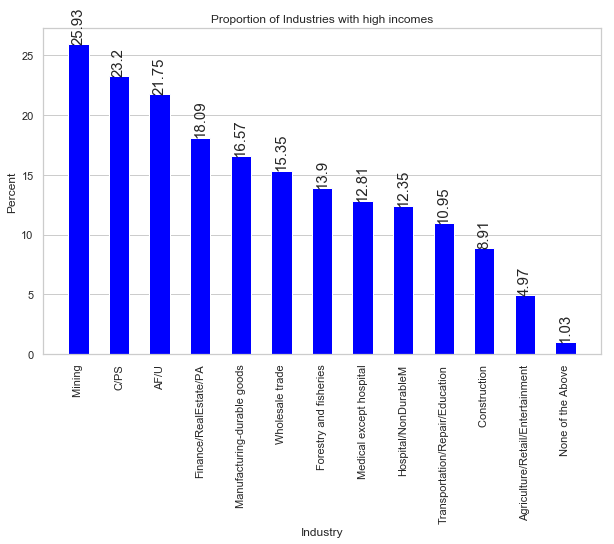

In [55]:
data = pd.crosstab(df['ind1'], df['total_income'], normalize='index').iloc[:,1].sort_values(ascending=False)*100
x = range( len( data))
width = 0.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
p1=axes.bar(x, data, width, align="center", color="blue")
axes.set_xticks(range(len(data)))
axes.set_xticklabels(data.axes[0],rotation=90)
axes.set_title( "Proportion of Industries with high incomes")
axes.set_xlabel("Industry")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
for idx,rect in enumerate(p1):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., 1.00*height,
           np.round(data[idx],2),
            ha='center', va='bottom', rotation=90,size=15)


plt.show()
plt.close()

The industries associated with high incomes are the Communications and Professional Services industries.

Mining, Armed Forces, and Utilities although are of the top most associated occupation with high income, the quantity of data points considered for this category is small and therefore we cannot conclude that this is applicable to the population.

<a id="dp_class"></a> 

## Class of Worker

Referring back to the chart of probabilities of Class of Worker having high incomes:

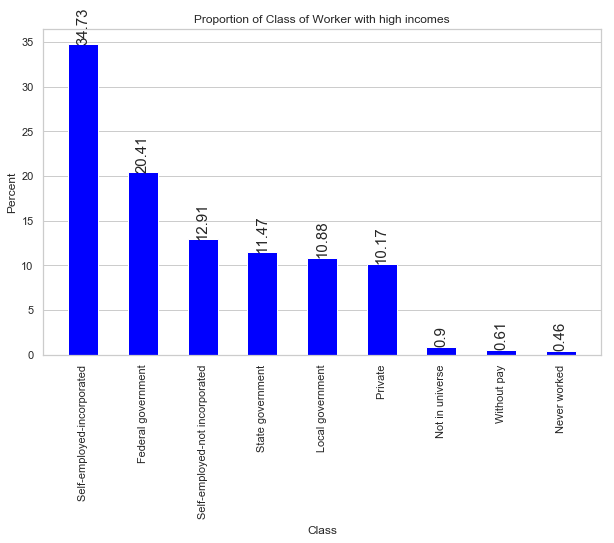

In [56]:
data = pd.crosstab(df['class'], df['total_income'], normalize='index').iloc[:,1].sort_values(ascending=False)*100
x = range( len( data))
width = 0.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
p1=axes.bar(x, data, width, align="center", color="blue")
axes.set_xticks(range(len(data)))
axes.set_xticklabels(data.axes[0],rotation=90)
axes.set_title( "Proportion of Class of Worker with high incomes")
axes.set_xlabel("Class")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
for idx,rect in enumerate(p1):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., 1.00*height,
           np.round(data[idx],2),
            ha='center', va='bottom', rotation=90,size=15)


plt.show()
plt.close()

The Class of Worker values having probabilities less than 0.05 can be grouped into 'None of the Above'. They won't have any strong impact on our model due to their low values.

This represents those Not in Universe, Without Pay, and Never worked.

The `class_1` feature will be added, representing the modified grouping of `class`

In [57]:
df['class_1']=df['class'].copy()
df['class_1']=df['class_1'].apply(lambda x: 'None of the Above' if 'Never' in x else x)
df['class_1']=df['class_1'].apply(lambda x: 'None of the Above' if 'Without' in x else x)
df['class_1']=df['class_1'].apply(lambda x: 'None of the Above' if 'Not' in x else x)



In [58]:
pd.crosstab(df['class_1'], df['total_income'])

total_income,- 50000.,50000+.
class_1,,
Federal government,2328,597
Local government,6937,847
Private,64706,7322
Self-employed-incorporated,2131,1134
Self-employed-not incorporated,7355,1090
State government,3742,485
None of the Above,99942,907


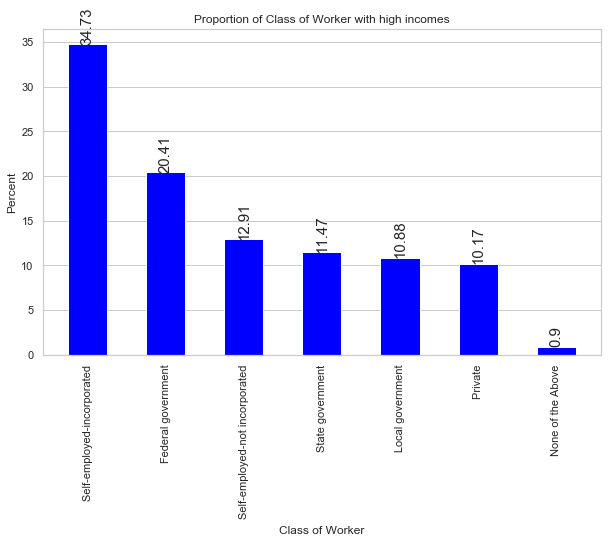

In [59]:
data = pd.crosstab(df['class_1'], df['total_income'], normalize='index').iloc[:,1].sort_values(ascending=False)*100
x = range( len( data))
width = 0.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
p1=axes.bar(x, data, width, align="center", color="blue")
axes.set_xticks(range(len(data)))
axes.set_xticklabels(data.axes[0],rotation=90)
axes.set_title( "Proportion of Class of Worker with high incomes")
axes.set_xlabel("Class of Worker")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
for idx,rect in enumerate(p1):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., 1.00*height,
           np.round(data[idx],2),
            ha='center', va='bottom', rotation=90,size=15)


plt.show()
plt.close()

The employers associated with high incomes are:

1. Self-employed-incorporated
2. Federal government


<a id="dp_edu"></a> 

## Education

Referring back to the chart of probabilities of Education Levels having high incomes:

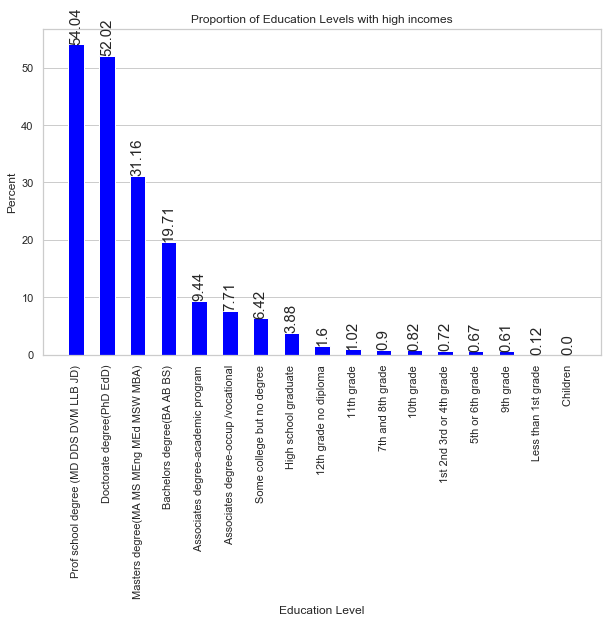

In [60]:
data = pd.crosstab(df['education'], df['total_income'], normalize='index').iloc[:,1].sort_values(ascending=False)*100
x = range( len( data))
width = 0.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
p1=axes.bar(x, data, width, align="center", color="blue")
axes.set_xticks(range(len(data)))
axes.set_xticklabels(data.axes[0],rotation=90)
axes.set_title( "Proportion of Education Levels with high incomes")
axes.set_xlabel("Education Level")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
for idx,rect in enumerate(p1):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., 1.00*height,
           np.round(data[idx],2),
            ha='center', va='bottom', rotation=90,size=15)


plt.show()
plt.close()

`education` can be re-organized into based on probability smilarity:

* Prof Schools and Doctorates
* Masters Degrees
* Bachelors Degrees
* Associates Degrees
* College
* High School
* None


The `Edu_01` feature will be added, this represents the modified grouping of `education`

In [61]:
df['Edu_01']=df['education']
df['Edu_01']=df['Edu_01'].apply(lambda x:'High School' if 'High' in x else x)
xx=['Prof Schools and Doctorates','Masters Degree','Bachelors Degree','Associates Degree','College','High School']
df['Edu_01']=df['Edu_01'].apply(lambda x:'College' if 'college' in x else x)
df['Edu_01']=df['Edu_01'].apply(lambda x:'Prof Schools and Doctorates' if 'Prof' in x else x)
df['Edu_01']=df['Edu_01'].apply(lambda x:'Prof Schools and Doctorates' if 'Doc' in x else x)
df['Edu_01']=df['Edu_01'].apply(lambda x:'Masters Degree' if 'Masters' in x else x)
df['Edu_01']=df['Edu_01'].apply(lambda x:'Bachelors Degree' if 'Bach' in x else x)
df['Edu_01']=df['Edu_01'].apply(lambda x:'Associates Degree' if 'Assoc' in x else x)
df['Edu_01']=df['Edu_01'].apply(lambda x:x if x in xx else 'None')

In [62]:
pd.crosstab(df['Edu_01'], df['total_income'])

total_income,- 50000.,50000+.
Edu_01,,
Associates Degree,8896,825
Bachelors Degree,15950,3915
College,26033,1787
High School,46528,1879
Masters Degree,4503,2038
None,83801,312
Prof Schools and Doctorates,1430,1626


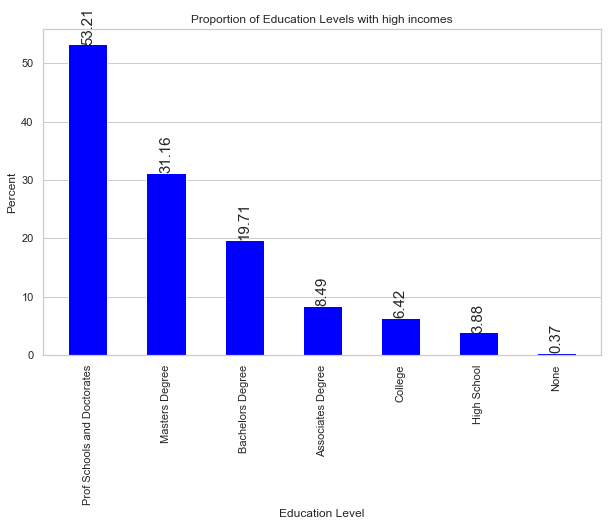

In [63]:
data = pd.crosstab(df['Edu_01'], df['total_income'], normalize='index').iloc[:,1].sort_values(ascending=False)*100
x = range( len( data))
width = 0.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
p1=axes.bar(x, data, width, align="center", color="blue")
axes.set_xticks(range(len(data)))
axes.set_xticklabels(data.axes[0],rotation=90)
axes.set_title( "Proportion of Education Levels with high incomes")
axes.set_xlabel("Education Level")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
for idx,rect in enumerate(p1):
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., 1.00*height,
           np.round(data[idx],2),
            ha='center', va='bottom', rotation=90,size=15)


plt.show()
plt.close()

The education levels associated with high incomes are:

1. Professional Schools and Doctorates
2. Masters Degrees
3. Bachelors Degrees

It is interesting to see the sharp increase in probability from a Bachelors Degree to a Masters Degree, and from a Masters Degree to a Proffesional School or Doctorate degree.

Having a degree of higher education is conclusively related to having a higher income.

<a id="dp_dummy"></a> 

## Preparation of Dummy Variables:

Setting up the training set:

In [64]:
df_train=df.copy()

In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   age              199523 non-null  int64  
 1   employment       199523 non-null  object 
 2   maj_occ          199523 non-null  object 
 3   maj_ind          199523 non-null  object 
 4   class            199523 non-null  object 
 5   self_employed    199523 non-null  int64  
 6   education        199523 non-null  object 
 7   sex              199523 non-null  object 
 8   marital_status   199523 non-null  object 
 9   total_income     199523 non-null  object 
 10  total_income_01  199523 non-null  int64  
 11  age_01           199523 non-null  float64
 12  emp1             199523 non-null  object 
 13  occ1             199523 non-null  object 
 14  ind1             199523 non-null  object 
 15  class_1          199523 non-null  object 
 16  Edu_01           199523 non-null  obje

Removing the original groups and keeping only the modified ones

In [66]:
df_train=df_train.iloc[:,[11,12,13,14,15,16,7,10]]

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   age_01           199523 non-null  float64
 1   emp1             199523 non-null  object 
 2   occ1             199523 non-null  object 
 3   ind1             199523 non-null  object 
 4   class_1          199523 non-null  object 
 5   Edu_01           199523 non-null  object 
 6   sex              199523 non-null  object 
 7   total_income_01  199523 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 12.2+ MB


Creating dummy variables:

In [68]:
df_train=pd.get_dummies(df_train, columns=["emp1"],prefix='emp',drop_first=True)
df_train=pd.get_dummies(df_train, columns=["occ1"],prefix='occ',drop_first=True)
df_train=pd.get_dummies(df_train, columns=["ind1"],prefix='ind',drop_first=True)
df_train=pd.get_dummies(df_train, columns=["class_1"],prefix='class',drop_first=True)
df_train=pd.get_dummies(df_train, columns=["Edu_01"],prefix='edu',drop_first=True)
df_train=pd.get_dummies(df_train, columns=["sex"],prefix='sex',drop_first=True)


In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   age_01                                    199523 non-null  float64
 1   total_income_01                           199523 non-null  int64  
 2   emp_ Full-time schedules                  199523 non-null  uint8  
 3   emp_ PT for econ reasons usually FT       199523 non-null  uint8  
 4   emp_ PT for econ reasons usually PT       199523 non-null  uint8  
 5   emp_ PT for non-econ reasons usually FT   199523 non-null  uint8  
 6   emp_None of the Above                     199523 non-null  uint8  
 7   occ_ Executive admin and managerial       199523 non-null  uint8  
 8   occ_ Farming forestry and fishing         199523 non-null  uint8  
 9   occ_ Precision production craft & repair  199523 non-null  uint8  
 10  occ_ Professional sp

Performing correlative analysis to alleviate possible multicollinearity:

In [70]:
df_train.corr()

,age_01,total_income_01,emp_ Full-time schedules,emp_ PT for econ reasons usually FT,emp_ PT for econ reasons usually PT,emp_ PT for non-econ reasons usually FT,emp_None of the Above,occ_ Executive admin and managerial,occ_ Farming forestry and fishing,occ_ Precision production craft & repair,...,class_ Self-employed-not incorporated,class_ State government,class_None of the Above,edu_Bachelors Degree,edu_College,edu_High School,edu_Masters Degree,edu_None,edu_Prof Schools and Doctorates,sex_ Male
age_01,1.000000,0.135720,0.099882,0.008185,0.024424,0.029611,0.283570,0.087362,0.036616,0.047466,...,0.098255,0.035724,-0.181889,0.110937,0.099855,0.267545,0.098984,-0.454895,0.076030,-0.052560
total_income_01,0.135720,1.000000,0.146261,-0.000641,0.021407,0.030335,-0.075387,0.241584,-0.005876,0.028100,...,0.058393,0.032124,-0.222357,0.186097,0.003631,-0.054522,0.190403,-0.206469,0.242970,0.157610
emp_ Full-time schedules,0.099882,0.146261,1.000000,-0.026016,-0.039547,-0.065907,-0.212914,0.152721,0.049075,0.115709,...,0.099727,0.074082,-0.510314,0.122846,0.090170,0.093135,0.072866,-0.292334,0.054882,0.053242
emp_ PT for econ reasons usually FT,0.008185,-0.000641,-0.026016,1.000000,-0.004010,-0.006684,-0.021591,0.000049,0.016274,0.036042,...,0.036824,-0.004839,-0.051927,0.001219,0.003332,0.019543,-0.005061,-0.019480,-0.000829,0.013437
emp_ PT for econ reasons usually PT,0.024424,0.021407,-0.039547,-0.004010,1.000000,-0.010160,-0.032822,0.019801,0.021741,0.030711,...,0.040362,0.021252,-0.078935,0.024293,0.006605,0.013511,0.018266,-0.044555,0.012875,0.005699
emp_ PT for non-econ reasons usually FT,0.029611,0.030335,-0.065907,-0.006684,-0.010160,1.000000,-0.054698,0.033136,0.021261,0.027673,...,0.038014,0.049402,-0.131078,0.030776,0.029265,0.020289,0.018498,-0.075709,0.010882,-0.003348
emp_None of the Above,0.283570,-0.075387,-0.212914,-0.021591,-0.032822,-0.054698,1.000000,-0.095681,-0.030794,-0.073171,...,-0.073808,-0.053562,0.312847,-0.037677,0.014189,0.063587,-0.023971,-0.018101,-0.022610,-0.086695
occ_ Executive admin and managerial,0.087362,0.241584,0.152721,0.000049,0.019801,0.033136,-0.095681,1.000000,-0.032715,-0.060974,...,0.068135,0.046297,-0.260768,0.191579,0.054868,-0.019132,0.119930,-0.204700,0.017791,0.042939
occ_ Farming forestry and fishing,0.036616,-0.005876,0.049075,0.016274,0.021741,0.021261,-0.030794,-0.032715,1.000000,-0.029858,...,0.257951,-0.004931,-0.124579,-0.012526,0.002595,0.033012,-0.016298,-0.015990,-0.010217,0.082194
occ_ Precision production craft & repair,0.047466,0.028100,0.115709,0.036042,0.030711,0.027673,-0.073171,-0.060974,-0.029858,1.000000,...,0.096786,-0.010720,-0.238128,-0.035745,0.039136,0.122181,-0.034992,-0.111053,-0.026317,0.200222


The feature `class_None of the Above` is correlated with several of the other features:

In [71]:
df_train.corr().loc['class_None of the Above'].sort_values()

class_ Private                             -0.759869
emp_ Full-time schedules                   -0.510314
ind_Agriculture/Retail/Entertainment       -0.350826
ind_Transportation/Repair/Education        -0.319076
occ_ Professional specialty                -0.276917
occ_ Executive admin and managerial        -0.260768
occ_ Sales                                 -0.252462
ind_Hospital/NonDurableM                   -0.242255
ind_Finance/RealEstate/PA                  -0.241088
occ_ Precision production craft & repair   -0.238128
total_income_01                            -0.222357
ind_ Manufacturing-durable goods           -0.219580
class_ Self-employed-not incorporated      -0.212534
edu_Bachelors Degree                       -0.210282
class_ Local government                    -0.203695
edu_High School                            -0.194154
edu_College                                -0.182596
age_01                                     -0.181889
ind_C/PS                                   -0.

`class_None of the Above` has strong correlations with `class_Private`, `ind_None of the Above`, and `occ_None of the Above` and will therefore be removed from modeling.

In [72]:
df_train.pop('class_None of the Above')

0         1
1         0
2         1
3         1
4         1
         ..
199518    1
199519    0
199520    1
199521    1
199522    0
Name: class_None of the Above, Length: 199523, dtype: uint8

<a id="dp_test"></a> 

## Loading the Test Set

In [73]:
df_test=pd.read_csv('census_income_test.csv',header=None)

Naming the columns based on the census_income_metadata.txt file

In [74]:
df_test.columns=['age','class','industry code','occupation code','education',
            'wage_hr','enrolled in edu inst last wk','marital_status',
            'maj_ind','maj_occ','race','hispanic Origin','sex',
            'member of a labor union','reason for unemployment','employment',
            'capital_gains','capital_losses','divdends','tax filer status',
            'region of previous residence','state of previous residence',
            'detailed household and family stat','detailed household summary in household','instance_weight',
            'migration code-change in msa','migration code-change in reg',
            'migration code-move within reg ','live in this house 1 year ago',
            'migration prev res in sunbelt','num persons worked for employer',
            'family members under 18','country of birth father','country of birth mother',
            'country of birth self','citizenship','self_employed',
            'fill inc questionnaire for veterans admin ',
            'veterans benefits ','weeks worked in year ','year','total_income']

Isolating the features that we will be analysing in this case study:

In [75]:
df_test=df_test[['age','employment','maj_occ','maj_ind','class','self_employed','education','sex','marital_status','total_income']]

Processing our test set to match the structure of our training set:

In [76]:
df_test['total_income_01']=df_test['total_income'].apply(lambda x: 1 if '+' in x else 0)
df_test['age_01']=df_test['age']/90
df_test['emp1']=df_test['employment'].copy()
df_test['emp1']=df_test['emp1'].apply(lambda x: 'None of the Above' if 'Unemployed' in x else x)
df_test['emp1']=df_test['emp1'].apply(lambda x: 'None of the Above' if 'labor force' in x else x)
df_test['occ1']=df_test['maj_occ'].copy()
df_test['occ1']=df_test['occ1'].apply(lambda x: 'None of the Above' if 'Private household' in x else x)
df_test['occ1']=df_test['occ1'].apply(lambda x: 'None of the Above' if 'universe' in x else x)
df_test['occ1']=df_test['occ1'].apply(lambda x: 'None of the Above' if 'Other service' in x else x)
df_test['occ1']=df_test['occ1'].apply(lambda x: 'None of the Above' if 'Handlers equip' in x else x)
df_test['occ1']=df_test['occ1'].apply(lambda x: 'None of the Above' if 'Adm support' in x else x)
df_test['occ1']=df_test['occ1'].apply(lambda x: 'None of the Above' if 'Machine operators' in x else x)
df_test['ind1']=df_test['maj_ind'].copy()
df_test['ind1']=df_test['ind1'].apply(lambda x: 'None of the Above' if 'Private household' in x else x)
df_test['ind1']=df_test['ind1'].apply(lambda x: 'None of the Above' if 'universe' in x else x)
df_test['ind1']=df_test['ind1'].apply(lambda x: 'None of the Above' if 'Social services' in x else x)
df_test['ind1']=df_test['ind1'].apply(lambda x: 'None of the Above' if 'HH' in x else x)
df_test['ind1']=df_test['ind1'].apply(lambda x: 'Agriculture/Retail/Entertainment' if 'Retail' in x else x)
df_test['ind1']=df_test['ind1'].apply(lambda x: 'Agriculture/Retail/Entertainment' if 'Agric' in x else x)
df_test['ind1']=df_test['ind1'].apply(lambda x: 'Agriculture/Retail/Entertainment' if 'Entertai' in x else x)
df_test['ind1']=df_test['ind1'].apply(lambda x: 'Transportation/Repair/Education' if 'Transp' in x else x)
df_test['ind1']=df_test['ind1'].apply(lambda x: 'Transportation/Repair/Education' if 'repair' in x else x)
df_test['ind1']=df_test['ind1'].apply(lambda x: 'Transportation/Repair/Education' if 'Educa' in x else x)
df_test['ind1']=df_test['ind1'].apply(lambda x: 'Hospital/NonDurableM' if 'Hospital serv' in x else x)
df_test['ind1']=df_test['ind1'].apply(lambda x: 'Hospital/NonDurableM' if 'nondurable' in x else x)
df_test['ind1']=df_test['ind1'].apply(lambda x: 'Finance/RealEstate/PA' if 'Finance' in x else x)
df_test['ind1']=df_test['ind1'].apply(lambda x: 'Finance/RealEstate/PA' if 'Public adm' in x else x)
df_test['ind1']=df_test['ind1'].apply(lambda x: 'AF/U' if 'Armed' in x else x)
df_test['ind1']=df_test['ind1'].apply(lambda x: 'AF/U' if 'Utilities' in x else x)
df_test['ind1']=df_test['ind1'].apply(lambda x: 'C/PS' if 'Commun' in x else x)
df_test['ind1']=df_test['ind1'].apply(lambda x: 'C/PS' if 'professional serv' in x else x)
df_test['class_1']=df_test['class'].copy()
df_test['class_1']=df_test['class_1'].apply(lambda x: 'None of the Above' if 'Never' in x else x)
df_test['class_1']=df_test['class_1'].apply(lambda x: 'None of the Above' if 'Without' in x else x)
df_test['class_1']=df_test['class_1'].apply(lambda x: 'None of the Above' if 'Not' in x else x)
df_test['Edu_01']=df_test['education']
df_test['Edu_01']=df_test['Edu_01'].apply(lambda x:'High School' if 'High' in x else x)
df_test['Edu_01']=df_test['Edu_01'].apply(lambda x:'College' if 'college' in x else x)
df_test['Edu_01']=df_test['Edu_01'].apply(lambda x:'Prof Schools and Doctorates' if 'Prof' in x else x)
df_test['Edu_01']=df_test['Edu_01'].apply(lambda x:'Prof Schools and Doctorates' if 'Doc' in x else x)
df_test['Edu_01']=df_test['Edu_01'].apply(lambda x:'Masters Degree' if 'Masters' in x else x)
df_test['Edu_01']=df_test['Edu_01'].apply(lambda x:'Bachelors Degree' if 'Bach' in x else x)
df_test['Edu_01']=df_test['Edu_01'].apply(lambda x:'Associates Degree' if 'Assoc' in x else x)
df_test['Edu_01']=df_test['Edu_01'].apply(lambda x:x if x in xx else 'None')
df_test=df_test.iloc[:,[11,12,13,14,15,16,7,10]]
df_test=pd.get_dummies(df_test, columns=["emp1"],prefix='emp',drop_first=True)
df_test=pd.get_dummies(df_test, columns=["occ1"],prefix='occ',drop_first=True)
df_test=pd.get_dummies(df_test, columns=["ind1"],prefix='ind',drop_first=True)
df_test=pd.get_dummies(df_test, columns=["class_1"],prefix='class',drop_first=True)
df_test=pd.get_dummies(df_test, columns=["Edu_01"],prefix='edu',drop_first=True)
df_test=pd.get_dummies(df_test, columns=["sex"],prefix='sex',drop_first=True)
df_test.pop('class_None of the Above')

0        0
1        0
2        1
3        0
4        0
        ..
99757    1
99758    0
99759    0
99760    0
99761    1
Name: class_None of the Above, Length: 99762, dtype: uint8

In [77]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   age_01                                    99762 non-null  float64
 1   total_income_01                           99762 non-null  int64  
 2   emp_ Full-time schedules                  99762 non-null  uint8  
 3   emp_ PT for econ reasons usually FT       99762 non-null  uint8  
 4   emp_ PT for econ reasons usually PT       99762 non-null  uint8  
 5   emp_ PT for non-econ reasons usually FT   99762 non-null  uint8  
 6   emp_None of the Above                     99762 non-null  uint8  
 7   occ_ Executive admin and managerial       99762 non-null  uint8  
 8   occ_ Farming forestry and fishing         99762 non-null  uint8  
 9   occ_ Precision production craft & repair  99762 non-null  uint8  
 10  occ_ Professional specialty       

In [78]:
df_test=df_test.reindex(columns=df_train.columns)

<a id="model"></a> 
## 3 - Data Modeling

We will be building three models to predict the target variable based on the features finalized in the previous section.

The models are:

* [Naive Bayes](#dm_nb)
* [Logistic Regression](#dm_lr)
* [Classification Tree](#dm_ct)


<a id="dm_nb"></a> 

## Naive Bayes

Fitting the training set:

In [79]:
Y = df_train.iloc[:,1]
X=df_train.copy()
X.pop('total_income_01')
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, Y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Loading and predicting the test set:

In [80]:
X_t=df_test.copy()
X_t.pop('total_income_01')
Y_t=df_test.iloc[:,1]

In [81]:
yp=clf.predict(X_t)

In [82]:
erps=[]
fps=[]
fns=[]

Calculating the error rate of the model by calculating the proportion of values it predicted incorrectly:

In [83]:
count=0
for i in range(len(yp)):
    if(yp[i]!=Y_t.loc[i]):
        count=count+1
count*100/len(yp)

14.461418175257112

Calculating the quantity of false positives and false negatives:

In [84]:
erps.append(count*100/len(yp))

In [85]:
fp=0
fn=0

for i in range(len(yp)):
    if(yp[i]!=Y_t.loc[i]):
        if yp[i]==1:
            fp=fp+1
        else:
            fn=fn+1

In [86]:
fps.append(fp)
fns.append(fn)

<a id="dm_lr"></a> 

## Logistic Regression

Fitting the training set:

In [87]:
import statsmodels.api as sm

In [88]:
Y=df_train.iloc[:,1]
X=df_train.copy()
X.pop('total_income_01')
mod = sm.Logit(Y, X)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.144037
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:        total_income_01   No. Observations:               199523
Model:                          Logit   Df Residuals:                   199484
Method:                           MLE   Df Model:                           38
Date:                Fri, 14 May 2021   Pseudo R-squ.:                  0.3807
Time:                        17:37:45   Log-Likelihood:                -28739.
converged:                       True   LL-Null:                       -46408.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
age_01                                       3.

Loading and predicting the test set:

In [89]:
X_t=df_test.copy()
X_t.pop('total_income_01')
yp=res.predict(X_t)

In [90]:
Y_t=df_test.iloc[:,1]

Calculating the error rate of the model by calculating the proportion of values it predicted incorrectly:

In [91]:
count=0
for i in range(len(yp)):
    if(np.round(yp[i],0)!=Y_t.loc[i]):
        count=count+1
count*100/len(yp)

5.40586596098715

In [92]:
erps.append(count*100/len(yp))

Calculating the quantity of false positives and false negatives:

In [93]:
fp=0
fn=0

for i in range(len(yp)):
    if(np.round(yp[i],0)!=Y_t.loc[i]):
        if np.round(yp[i],0)==1:
            fp=fp+1
        else:
            fn=fn+1

In [94]:
fps.append(fp)
fns.append(fn)

<a id="dm_ct"></a> 

## Classification Tree

Fitting the training set:

In [95]:
 from sklearn.tree import DecisionTreeClassifier

In [96]:
 clf = DecisionTreeClassifier(random_state=0)

In [97]:
Y=df_train.iloc[:,1]
X=df_train.copy()
X.pop('total_income_01')
clf.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Loading and predicting the test set:

In [98]:
X_t=df_test.copy()
X_t.pop('total_income_01')
yp=clf.predict(X_t)
Y_t=df_test.iloc[:,1]

Calculating the error rate of the model by calculating the proportion of values it predicted incorrectly:

In [99]:
count=0
for i in range(len(yp)):
    if(yp[i]!=Y_t.loc[i]):
        count=count+1
count*100/len(yp)

6.795172510575169

In [100]:
erps.append(count*100/len(yp))

Calculating the quantity of false positives and false negatives:

In [101]:
fp=0
fn=0

for i in range(len(yp)):
    if(yp[i]!=Y_t.loc[i]):
        if yp[i]==1:
            fp=fp+1
        else:
            fn=fn+1

In [102]:
fps.append(fp)
fns.append(fn)

<a id="assess"></a> 
## 4 -Model Assessment

Constructing a summary table of our model performance:

In [103]:
df_ass=pd.DataFrame(data=np.zeros((3,4)),columns=['Model','Error Rate','False Positives','False Negatives'])

In [104]:
df_ass.iloc[0]=['Naive Bayes',erps[0],fps[0],fns[0]]
df_ass.iloc[1]=['Logistic Regression',erps[1],fps[1],fns[1]]
df_ass.iloc[2]=['Classification Tree',erps[2],fps[2],fns[2]]

In [105]:
df_ass

,Model,Error Rate,False Positives,False Negatives
0,Naive Bayes,14.461418,12957.0,1470.0
1,Logistic Regression,5.405866,925.0,4468.0
2,Classification Tree,6.795173,2555.0,4224.0


Converting the false positive and false negative values to percentages:

In [106]:
df_ass['False Positives']=100*df_ass['False Positives']/len(df_test[df_test['total_income_01']==0])
df_ass['False Negatives']=100*df_ass['False Negatives']/len(df_test[df_test['total_income_01']==1])

In [107]:
df_ass

,Model,Error Rate,False Positives,False Negatives
0,Naive Bayes,14.461418,13.846499,23.763337
1,Logistic Regression,5.405866,0.988501,72.227611
2,Classification Tree,6.795173,2.730401,68.283220


We can see from the table above that Naive Bayes had the highest Error Rate at 14.5%. Logistic Regression had the lowest at 5.4% and the Classification Tree has an error rate of 6.8%. By that premise, choosing Logistic Regression as our model of choice would be the obvious answer. 

However, taking a deeper look at the rate of false positives and negatives, Logistic Regression had an extremely low rate of false positives at 1% and a high rate of false negatives at 72%. This indicates that Logistic Regression got the actual positive values ('50000+' in this case) wrong 72% of the time, a poor accuracy towards high income data.

The classification tree model has a similar false positive and negative rate, but looking at the Naive Bayes model, although there may be a higher total error rate and a higher false positive rate of 14%, the false negative rate is by far the lowest at 24%. 

Naive Bayes had an accuracy of 86% when predicting low income values and 76% when predicting high income values, making it the most effective model in identifying characteristics associated with a person making more or less than $50,000 a year.

**Therefore, Naive Bayes will be selected as our model**

<a id="results"></a> 
## 4 -Results

## Summary

Based on our analysis conducted in this case study, the primary variables associated with a person making more or less than $50,000 a year are as follows:

* Age
* Employment Status
* Occupation
* Industry
* Class of Worker
* Education Level
* Sex

The variable characteristcs associated with a high income are as follows:

**Age:** 30-60

**Employment Status:** Full time employment and part-time for non-economic reasons

**Occupation:** Executive/Managerial roles, professional speciality roles. Armed Forces inconclusive due to limited data.

**Industry:** Communications and Professinal Services. Mining and Armed Forces inconclusive due to limited data.

**Class of Worker Employer**: Self employed incorporated and Federal government.

**Education Level**: Having a post-graduate degree

**Sex:** Male

**Recommendations**

Data cleaning can be performed on the work related columns. Children, Armed Forces, and Not in Universe were grouped together in a few occasions. It may be insightful to separate them and see their income corrolations.

Furthermore, some of the occupation and industry codes have been arbitrarily grouped together within the initally provided data set, for example Business and Repair Services. It would be insightful to have the major industry codes and major occupation provided seperately. Perhaps a detailed analysis of Detailed Industry Code of Detailed Occupation Code could have aided in their separation.

Most of the variables of the 42 initial columns were excluded from this analysis, however, a few columns are important to mention as their analysis may provide more insights on total income.

* **Detailed Industry Code**
* **Detailed Occupation Code**
* **Capital Gains**
* **Divdends from Stocks**
* **Capital Losses**
* **Hourly Wage**
* **Working Hours per Week**

Moreover, performing associative pairwise EDA between the non-target variables could further improve the model and alleviate multicollinearity.


**Future Improvements**

Performing elimination optimization techniques (eg. backward elimination) on our logistic regression model may improve its performance.

The Naive Bayes error rate reported in the census_income_metadata.txt file was 23.2 %, our modeling technique for Naive Bayes seems to have resulted in an improvement of 12 %.

However, the decision tree models reported in the metadata file shows superior models with 4.6% error rates, whereas our tree was able to achieve 6.8 %. The decision tree model we used is the scikit-learn classification tree which follows an optimized CART algorithm.

Perhaps customizing the development of the model and adding specific rules to the construction of the trees could meet or exceed the performances mentioned in the metadata file.